## Final Exam
### Brandon Owens and Loan Pham

### Q.1 

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC


In [17]:
# (a) Read in the dataset “kc_house_data.csv”
df_house = pd.read_csv("kc_house_data.csv")
df_house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1800,7503


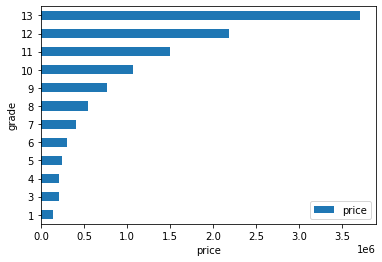

In [18]:
# (b) First, use groupby to find the average price for each grade of houses. Then, recreate the following bar plot.

grouped_df = df_house.groupby("grade").mean().reset_index()
new_table = grouped_df[['grade', 'price']].set_index('grade').plot.barh().set_xlabel("price")


array([[<AxesSubplot:title={'center':'bathrooms'}>]], dtype=object)

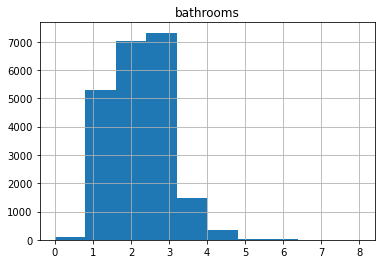

In [19]:
# (c) Plot a histogram on “bathrooms”

df_house.hist(column=["bathrooms"])

In [22]:
# (d) Create a correlation matrix and then plot the following heatmap.
corr = df_house.corr()
corr.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.144608,0.718557


<AxesSubplot:>

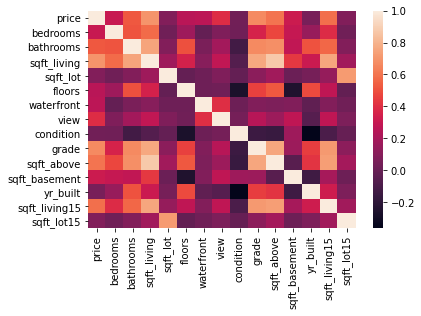

In [24]:
sns.heatmap(corr)

In [36]:
# (e) Check for any missing values in the dataframe.
df_house.isnull().any()

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [ ]:
# (f) Set y = price and all other features to be X. Split your data into training set and testing set.

X_train, X_test, y_train, y_test = train_test_split(house_temp,newdf_housing, test_size = 0.3, random_state = 42)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))